In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1SlkctUQm439s7HcT-7im5GbTD-EofJ1V
!gdown 1-nkxPv3nLvMNRI0Z8y0HP4ZHMUY9ypXk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1-nkxPv3nLvMNRI0Z8y0HP4ZHMUY9ypXk
To: /content/dataAPT.zip
100% 244M/244M [00:03<00:00, 63.3MB/s]


In [ ]:
!unzip data_for_supervised.zip

Archive:  dataAPT.zip
   creating: CICIDS2018/
   creating: SCVIC_APT/
  inflating: CICIDS2018/all_data.csv  
  inflating: SCVIC_APT/Testing.csv   
  inflating: SCVIC_APT/Training.csv  


In [ ]:
!unzip data_for_unsupervised.zip

In [ ]:
!ls

CICIDS2018  dataAPT.zip  sample_data  SCVIC_APT


In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
import time
seconds = time.time()

In [ ]:
df=pd.read_csv('CICIDS2018/all_data.csv')

In [ ]:
df.shape

(2830743, 79)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 int64  
 15  Flow Packets/s               int64  
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [ ]:
df.describe()

Destination Port  Flow Duration  Total Fwd Packets  \
count      2.830743e+06   2.830743e+06       2.830743e+06   
mean       8.071483e+03   1.478566e+07       9.361160e+00   
std        1.828363e+04   3.365374e+07       7.496728e+02   
min        0.000000e+00  -1.300000e+01       1.000000e+00   
25%        5.300000e+01   1.550000e+02       2.000000e+00   
50%        8.000000e+01   3.131600e+04       2.000000e+00   
75%        4.430000e+02   3.204828e+06       5.000000e+00   
max        6.553500e+04   1.200000e+08       2.197590e+05   

       Total Backward Packets  Total Length of Fwd Packets  \
count            2.830743e+06                 2.830743e+06   
mean             1.039377e+01                 5.493024e+02   
std              9.973883e+02                 9.993589e+03   
min              0.000000e+00                 0.000000e+00   
25%              1.000000e+00                 1.200000e+01   
50%              2.000000e+00                 6.200000e+01   
75%              4.000000e+00                 1.870000e+02   
max              2.919220e+05                 1.290000e+07   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
count                 2.830743e+06           2.830743e+06   
mean                  1.616264e+04           2.075999e+02   
std                   2.263088e+06           7.171848e+02   
min                   0.000000e+00           0.000000e+00   
25%                   0.000000e+00           6.000000e+00   
50%                   1.230000e+02           3.700000e+01   
75%                   4.820000e+02           8.100000e+01   
max                   6.554530e+08           2.482000e+04   

       Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
count           2.830743e+06            2.830743e+06           2.830743e+06   
mean            1.871366e+01            5.820194e+01           6.891013e+01   
std             6.033935e+01            1.860912e+02           2.811871e+02   
min             0.000000e+00            0.000000e+00           0.000000e+00   
25%             0.000000e+00            6.000000e+00           0.000000e+00   
50%             2.000000e+00            3.400000e+01           0.000000e+00   
75%             3.600000e+01            5.000000e+01           2.616295e+01   
max             2.325000e+03            5.940857e+03           7.125597e+03   

       ...  act_data_pkt_fwd  min_seg_size_forward   Active Mean  \
count  ...      2.830743e+06          2.830743e+06  2.830743e+06   
mean   ...      5.418218e+00         -2.741688e+03  8.155132e+04   
std    ...      6.364257e+02          1.084989e+06  6.485999e+05   
min    ...      0.000000e+00         -5.368707e+08  0.000000e+00   
25%    ...      0.000000e+00          2.000000e+01  0.000000e+00   
50%    ...      1.000000e+00          2.400000e+01  0.000000e+00   
75%    ...      2.000000e+00          3.200000e+01  0.000000e+00   
max    ...      2.135570e+05          1.380000e+02  1.100000e+08   

         Active Std    Active Max    Active Min     Idle Mean      Idle Std  \
count  2.830743e+06  2.830743e+06  2.830743e+06  2.830743e+06  2.830743e+06   
mean   4.113412e+04  1.531825e+05  5.829582e+04  8.316037e+06  5.038439e+05   
std    3.933815e+05  1.025825e+06  5.770923e+05  2.363008e+07  4.602984e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    7.420000e+07  1.100000e+08  1.100000e+08  1.200000e+08  7.690000e+07   

           Idle Max      Idle Min  
count  2.830743e+06  2.830743e+06  
mean   8.695752e+06  7.920031e+06  
std    2.436689e+07  2.336342e+07  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  
max    1.200000e+08  1.

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack - Brute Force         1507
Web Attack - XSS                  652
Infiltration                       36
Web Attack - Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64


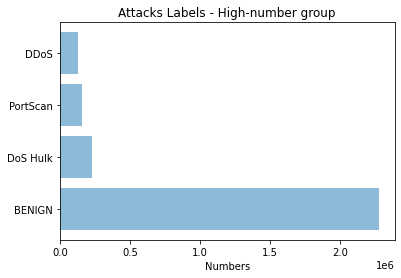

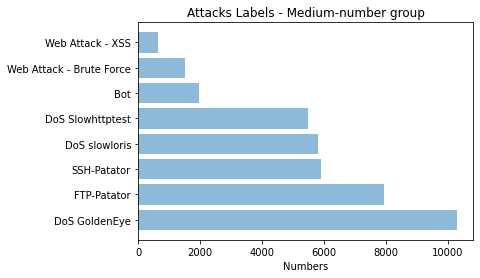

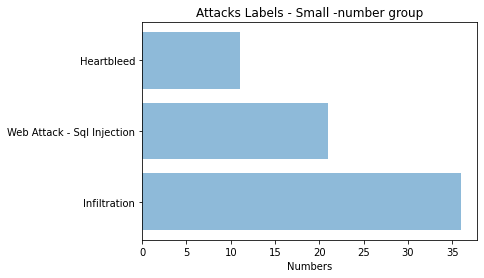

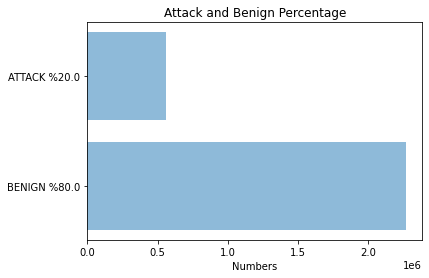

mission accomplished!
Total operation time: =  13.153138160705566 seconds


In [ ]:
##  all_data.csv files is required for the operation of the program.
##  all_data.csv file must be located in the same directory as the program.



##  The purpose of this program is to provide statistics about the data contained in the dataset.
##  Considering that some of the data are very large and some of them are very small, the graphics are created in three separate groups, so that all data can be seen:
##          big: labels with more than 11000 numbers
##          medium: labels with numbers between 600 and 11000
##          small: labels with fewer than 600 numbers
##  
##  In the last graphics, the rates of all attacks and normal behaviors are given.


#  graph creation function
def graph(objects,performance,x_label,y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()


df=pd.read_csv('CICIDS2018/all_data.csv', usecols=["Label"])
print(df.iloc[:,0].value_counts())
a=(df.iloc[:,0].value_counts())





key=a.keys()
values=a.values
small_labels=[]
small_values=[]
big_labels=[]
big_values=[]
medium_labels=[]
medium_values=[]
attacak=0
benign=0


## In this section, the attacks are grouped under 3 groups,
## so that all values can be seen on the graph.
for i in range(0,len(values)):
    if values[i]>11000:
        big_labels.append(str(key[i]))
        big_values.append(values[i])
    elif values[i]<600:
        small_labels.append(str(key[i]))
        small_values.append(values[i]) 
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(values[i])

    if str(key[i])=="BENIGN":
        benign+=values[i]
    else:
        attacak+=values[i]
        
key =[benign,attacak]


#functions are called to create a chartes
labels=["BENIGN %"+str(round(benign/(benign+attacak),2)*100),
        "ATTACK %"+str(round(attacak/(benign+attacak),2)*100)]
graph(big_labels,big_values,"Numbers","Attacks Labels - High-number group")
graph(medium_labels,medium_values,"Numbers","Attacks Labels - Medium-number group")
graph(small_labels,small_values,"Numbers","Attacks Labels - Small -number group")
graph(labels,key,"Numbers","Attack and Benign Percentage")



print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")

In [ ]:
df["Label"].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack - Brute Force', 'Web Attack - XSS',
       'Web Attack - Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)